In [18]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
import os
os.listdir('/kaggle/input')

['jetqcd', 'qcddata']

# Cargamos los datos

Se cargan únicamente las variables keys, con el fin de ahorrar memoria y poder cargar más archivos. 
Para cargar todas las variables de la muestra, utilizar la línea *for key in h5fr.keys():.*  En este caso, por cuestiones de memoria, sólo podrían cargarse 10 archivos, en la muestra de entrenamiento.

In [20]:
keys =  ['Pileup_nPU','eventJetMult','isPhysUDS','isPhysG','jetQGl','jetPt', 'jetEta', 'QG_mult', 'QG_ptD', 'QG_axis2', 'jetArea', 'jetMass','jetGirth', 'jetChargedHadronMult', 'jetNeutralHadronMult']


In [21]:
import h5py
import glob


#Training DF
df = pd.DataFrame()
i=0
for file in glob.iglob('/kaggle/input/qcddata/*.h5'):
    #if(i>10) break; #se satura la memoria
    print(file)
    #i+=1
    dftemp = pd.DataFrame()
    with h5py.File(file, 'r') as h5fr:
        for key in keys:
        #for key in h5fr.keys():
            dftemp[key] = h5fr[key]
        #print(dftemp)
        df=pd.concat([df,dftemp])
 #print(df)
print("Loaded training data")

#Test DF
df2 = pd.DataFrame()
for file in glob.iglob('/kaggle/input/jetqcd/*.h5'):   
    print(file)
    dftemp = pd.DataFrame()
    with h5py.File(file, 'r') as h5fr:
        for key in keys:
        #for key in h5fr.keys():
            dftemp[key] = h5fr[key]
        #print(dftemp)
        df2=pd.concat([df2,dftemp])
 #print(df2)
print("Loaded test data")

/kaggle/input/qcddata/JetNtuple_RunIISummer16_13TeV_MC_88.h5
/kaggle/input/qcddata/JetNtuple_RunIISummer16_13TeV_MC_44.h5
/kaggle/input/qcddata/JetNtuple_RunIISummer16_13TeV_MC_115.h5
/kaggle/input/qcddata/JetNtuple_RunIISummer16_13TeV_MC_57.h5
/kaggle/input/qcddata/JetNtuple_RunIISummer16_13TeV_MC_47.h5
/kaggle/input/qcddata/JetNtuple_RunIISummer16_13TeV_MC_32.h5
/kaggle/input/qcddata/JetNtuple_RunIISummer16_13TeV_MC_95.h5
/kaggle/input/qcddata/JetNtuple_RunIISummer16_13TeV_MC_72.h5
/kaggle/input/qcddata/JetNtuple_RunIISummer16_13TeV_MC_79.h5
/kaggle/input/qcddata/JetNtuple_RunIISummer16_13TeV_MC_75.h5
/kaggle/input/qcddata/JetNtuple_RunIISummer16_13TeV_MC_97.h5
/kaggle/input/qcddata/JetNtuple_RunIISummer16_13TeV_MC_39.h5
/kaggle/input/qcddata/JetNtuple_RunIISummer16_13TeV_MC_45.h5
/kaggle/input/qcddata/JetNtuple_RunIISummer16_13TeV_MC_117.h5
/kaggle/input/qcddata/JetNtuple_RunIISummer16_13TeV_MC_119.h5
/kaggle/input/qcddata/JetNtuple_RunIISummer16_13TeV_MC_87.h5
/kaggle/input/qcddata

Filtramos la muestra y nos quedamos sólo con los jets originados por quarks ligeros o gluones.


In [22]:
df = df[(df.isPhysG==1) | (df.isPhysUDS==1)].reset_index()
df2 = df2[(df2.isPhysG==1) | (df2.isPhysUDS==1)].reset_index()

Descripción de la muestra:

In [23]:
print(df.shape)
print(df2.shape)
print(df.head(3))
df.info()

#numero de jets de quarks ligeros de la muestra de entrenamiento
quarks1= df[df.isPhysUDS==1]
nquarks1=len(quarks1)
print(nquarks1)

#numero de jets de gluones de la muestra de entrenamiento
gluon1= df[df.isPhysG==1]
ngluon1=len(gluon1)
print(ngluon1)

#numero de jets de quarks ligeros de la muestra test
quarks2= df2[df2.isPhysUDS==1]
nquarks2=len(quarks2)
print(nquarks2)

#numero de jets de gluones de la muestra test
gluon2= df2[df2.isPhysG==1]
ngluon2=len(gluon2)
print(ngluon2)

(2639108, 16)
(250290, 16)
   index  Pileup_nPU  eventJetMult  isPhysUDS  isPhysG    jetQGl       jetPt  \
0      2          16             2          1        0  0.422259  184.773071   
1      3          16             2          0        1  0.010465  144.884888   
2      4          13             2          0        1  0.049088  223.969086   

     jetEta  QG_mult    QG_ptD  QG_axis2   jetArea    jetMass  jetGirth  \
0 -0.164664       22  0.361133  0.012584  0.498666  18.820726  0.067192   
1  2.004492       25  0.318168  0.036347  0.488692  19.482527  0.077121   
2 -0.177670       26  0.295716  0.038368  0.538559  28.408321  0.085113   

   jetChargedHadronMult  jetNeutralHadronMult  
0                    15                     1  
1                    23                     1  
2                    21                     3  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639108 entries, 0 to 2639107
Data columns (total 16 columns):
 #   Column                Dtype  
---  ------

# Histogramas

A continuación se representa la distribución de los diferentes observables de la muestra, para los jets de gluones y quarks ligeros.

In [ ]:
var_hist= ['jetPt', 'jetEta', 'QG_mult', 'QG_ptD', 'QG_axis2', 'jetArea', 'jetMass','jetGirth', 'jetChargedHadronMult']
for observable in var_hist:
    fig, ax = plt.subplots()
    ax.hist(df[df.isPhysG==1][observable],  alpha=0.8, label='Gluon', density=1, bins=30)
    ax.hist( df[df.isPhysUDS==1][observable], alpha=0.8, label='Quark', density=1, bins=30 ) 
    ax.set_xlabel(observable) 
    ax.legend()
    if observable=='jetPt': ax.set_xlim(-20,3000) 
    if observable=='jetChargedHadronMult': ax.set_xlim(-1, 80)
    if observable== 'jetArea': ax.set_xlim(0.2, 0.8)
    if observable== 'jetMass': ax.set_xlim(-20, 400)
    plt.savefig(f'{observable}.png')
    plt.title(f'Distribución de {observable}')
    #plt.clf()

fig, ax = plt.subplots()
ax.hist(df[df.isPhysG==1]['jetNeutralHadronMult'],  alpha=0.8, label='Gluon', density=1, bins=12)
ax.hist( df[df.isPhysUDS==1]['jetNeutralHadronMult'], alpha=0.8, label='Quark', density=1, bins=12 ) 
ax.set_xlabel('jetNeutralHadronMult') 
ax.legend() 
ax.set_xlim(-1,12)
plt.savefig('jetNeutralHadronMult.png')

Representación de las distribuciones del número de jets por eventos y número de interacciones del pileup agregadas.

24.96232780166632

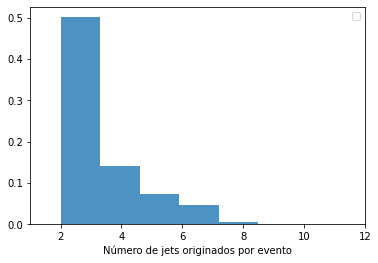

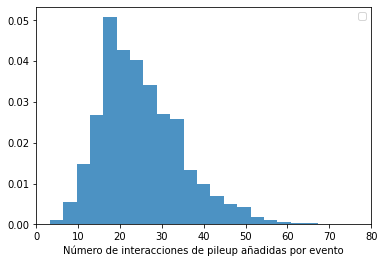

In [20]:
#variables por evento 

fig, ax = plt.subplots()
ax.hist(df['eventJetMult'],  alpha=0.8, density=1,bins=10)
#ax.hist( df[df.isPhysUDS==1]['event'], alpha=0.8, label='Quark', density=1 ) 
ax.set_xlabel('Número de jets originados por evento') 
ax.legend()
ax.set_xlim(1, 12)
plt.savefig('eventJetMult.png')

fig, ax = plt.subplots()
ax.hist(df['Pileup_nPU'],  alpha=0.8, density=1, bins=30)
#ax.hist( df[df.isPhysUDS==1]['event'], alpha=0.8, label='Quark', density=1 ) 
ax.set_xlabel('Número de interacciones de pileup añadidas por evento') 
ax.legend()
ax.set_xlim(0, 80)
plt.savefig('Pileup_nPU.png')

#media del número de jets resultantes por evento de la muestra
#np.mean(df['eventJetMult'])

#media del número de interacciones del pileup añadidas a la muestra
#np.mean(df['Pileup_nPU'])

Defino una función para calcular el error de validación cruzada de un modelo a partir de la matriz de confusión (2x2)

In [7]:
def error_validacion(confusion):
    return (confusion[1][0]+confusion[0][1])/(confusion[0][0]+confusion[1][1]+confusion[0][1]+confusion[1][0])*100
  

# Discriminante de probabilidad

Dsitribución del discriminante de probabilidad para nuestra muestra

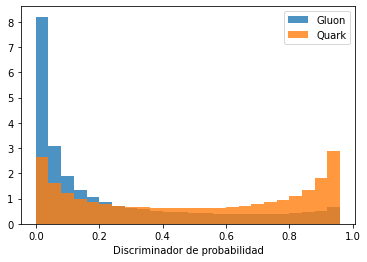

In [21]:
plt.clf()
binning = np.arange(0.0, 1.0, 0.04)
plt.hist( df[df.isPhysG==1]['jetQGl'], bins=binning, alpha=0.8, label='Gluon', density=1 )
plt.hist( df[df.isPhysUDS==1]['jetQGl'], bins=binning, alpha=0.8, label='Quark', density=1 )
plt.legend()
plt.xlabel('Discriminador de probabilidad')
#plt.title('')
plt.savefig('Discriminador_prob.png')

In [11]:
from sklearn.metrics import confusion_matrix, classification_report

#calculo aciertos y fallos del discriminante de probabilidad en la muestra test
#tomamos el umbral k=0.5 
y_discrim= (df2['jetQGl'] > 0.5).astype("int32") 
confusion_disc = confusion_matrix(df2.isPhysUDS, y_discrim)

print("Matriz de Confusión:")
print(confusion_disc)

print("\nReporte de Clasificación:")
print(classification_report(df2.isPhysUDS, y_discrim))

print("Error con la muestra test")
print(error_validacion(confusion_disc))

Matriz de Confusión:
[[117929  38518]
 [ 29875  63968]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.75      0.78    156447
           1       0.62      0.68      0.65     93843

    accuracy                           0.73    250290
   macro avg       0.71      0.72      0.71    250290
weighted avg       0.73      0.73      0.73    250290

Error con la muestra test
27.325502417196052


# Modelo red neuronal profunda

In [8]:
from sklearn.model_selection import train_test_split

train = df
test = df2

train_y = train.isPhysUDS
test_y = test.isPhysUDS
#tomamos quarks ligeros como variable y
#luego la variable final de salida va a tender a ser 1 para jets de uds

In [9]:
#escogemos las variables de entrada de la DNN
#input_features= ['QG_mult', 'QG_ptD', 'QG_axis2']

#mejores histogramas:
#input_features= ['QG_axis2', 'jetGirth','QG_ptD']

#juntandolas
#input_features= ['QG_mult', 'QG_ptD', 'QG_axis2', 'jetGirth']

#Otras opciones
#input_features = ['jetPt', 'jetEta', 'QG_mult', 'QG_ptD', 'QG_axis2']
input_features = ['jetEta','QG_ptD', 'QG_axis2','jetGirth', 'jetArea','QG_mult','jetMass', 'jetChargedHadronMult', 'jetNeutralHadronMult'] 


In [10]:
train_x = train[input_features]
test_x = test[input_features]

#Normalizamos
train_x_mean = train_x.mean()
train_x_std = train_x.std()

train_x = (train_x - train_x_mean) / train_x_std
test_x = (test_x - train_x_mean) / train_x_std

Establecemos la arquitectura del modelo y entrenamos

In [14]:
#ponemos una semilla para obtener siempre el mismo resultado
#import random
#random.seed(42)
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import keras.backend as K
sess = tf.Session()
K.set_session(sess)

from keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout
from sklearn.utils import class_weight

#Arquitectura de la red
model = Sequential()
model.add(Dense(100, kernel_initializer='normal', activation='relu', input_dim=train_x.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=['accuracy'])

#Igualamos los pesos de ambas clases, aunque haya más gluones
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(train_y), y=train_y[:]) 

#Entrenamos el modelo
model.fit(train_x,
          train_y,
          epochs=10,
          batch_size=128,
          class_weight=class_weights,
          validation_split=0.2,
          shuffle=True,
          verbose=1);

Train on 2111286 samples, validate on 527822 samples
Epoch 1/10
2109056/2111286 [============================>.] - ETA: 0s - loss: 0.4756 - acc: 0.7791

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


2111286/2111286 [==============================] - 47s 22us/sample - loss: 0.4756 - acc: 0.7791 - val_loss: 0.4718 - val_acc: 0.7805
Epoch 2/10
2111286/2111286 [==============================] - 47s 22us/sample - loss: 0.4721 - acc: 0.7807 - val_loss: 0.4705 - val_acc: 0.7817
Epoch 3/10
2111286/2111286 [==============================] - 46s 22us/sample - loss: 0.4714 - acc: 0.7811 - val_loss: 0.4701 - val_acc: 0.7820
Epoch 4/10
2111286/2111286 [==============================] - 47s 22us/sample - loss: 0.4710 - acc: 0.7814 - val_loss: 0.4703 - val_acc: 0.7814
Epoch 5/10
2111286/2111286 [==============================] - 46s 22us/sample - loss: 0.4707 - acc: 0.7815 - val_loss: 0.4709 - val_acc: 0.7813
Epoch 6/10
2111286/2111286 [==============================] - 47s 22us/sample - loss: 0.4705 - acc: 0.7815 - val_loss: 0.4699 - val_acc: 0.7819
Epoch 7/10
2111286/2111286 [==============================] - 47s 22us/sample - loss: 0.4703 - acc: 0.7817 - val_loss: 0.4704 - val_acc: 0.7819
Epo

In [ ]:
 print(model.summary())

**RESULTADOS**

Distribución del output de la red neuronal

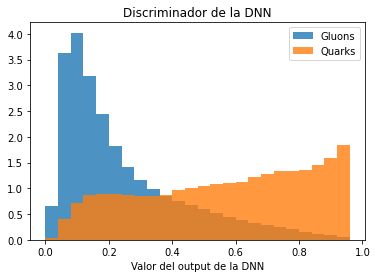

In [15]:
pred_y = model.predict(test_x)

plt.clf()
binning = np.arange(0.0, 1.0, 0.04)
plt.hist( pred_y[test_y==0], bins=binning, alpha=0.8, label="Gluons", density=1 )
plt.hist( pred_y[test_y==1], bins=binning, alpha=0.8, label="Quarks", density=1 )
plt.legend()
plt.xlabel('Valor del output de la DNN')
plt.title('Discriminador de la DNN')
plt.savefig('DNN_classifier.png')

Curva ROC y AUC

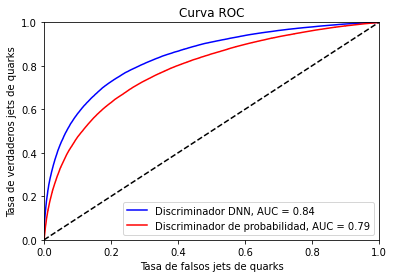

In [16]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

fpr_dnn, tpr_dnn, thresholds_dnn  = roc_curve(test_y, pred_y)
roc_auc_dnn = auc(fpr_dnn, tpr_dnn)

fpr_qgl, tpr_qgl, thresholds_qgl = roc_curve(test_y, test.jetQGl)
roc_auc_qgl = auc(fpr_qgl, tpr_qgl)

plt.clf()
plt.plot(fpr_dnn, tpr_dnn, 'b', label='Discriminador DNN, AUC = %0.2f'% roc_auc_dnn)
plt.plot(fpr_qgl, tpr_qgl, 'r', label='Discriminador de probabilidad, AUC = %0.2f'% roc_auc_qgl)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc = 'lower right')
plt.title("Curva ROC")
plt.ylabel('Tasa de verdaderos jets de quarks')
plt.xlabel('Tasa de falsos jets de quarks')
plt.savefig('ROC.png')

Calculo la matriz de confusion, el error de validacion, la precisión y la exhaustividad.

In [ ]:
print(test_y.value_counts())
print(sum(test_y==1)) #la clase 1 son los quarks y la clase 0 los gluones
print(train_y.value_counts())

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score

#umbral k=0.5
y_pred = (model.predict(test_x) > 0.5).astype("int32") 

#la clase 1 son los quarks

# Obtener la matriz de confusión
confusion = confusion_matrix(test_y, y_pred)

print("Matriz de Confusión:")
print(confusion)


print("\nReporte de Clasificación:")
print(classification_report(test_y, y_pred))

print("Error de validación")
print(error_validacion(confusion))

#precision total del modelo
precision = precision_score(test_y, y_pred, average='weighted')
print(precision)

Matriz de Confusión:
[[136799  19648]
 [ 35018  58825]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83    156447
           1       0.75      0.63      0.68     93843

    accuracy                           0.78    250290
   macro avg       0.77      0.75      0.76    250290
weighted avg       0.78      0.78      0.78    250290

Error de validación
21.84106436533621
0.778729596558467


Estudio las variables que más contribuyen en cada capa

In [27]:
from keras.models import Sequential
from keras.layers import Dense

#creo un diccionario para almacenar los datos
feature_importance_by_layer = {}

# Iterar sobre las capas del modelo
for i, layer in enumerate(model.layers):
    if len(layer.get_weights()) > 0:
        # Obtener los pesos de la capa
        layer_weights = layer.get_weights()[0]
        
        # Obtener los nombres de las variables de entrada
        feature_names= input_features
        # Calcular la importancia promedio de cada variable de entrada por capa
        feature_importance = np.abs(layer_weights).mean(axis=0)
        
        # Almacenar la importancia en el diccionario
        feature_importance_by_layer[f"Capa_{i}"] = dict(zip(feature_names, feature_importance))

# Imprimir la importancia de las variables de entrada por capa
for layer, importance_dict in feature_importance_by_layer.items():
    print(f"\nCapa {layer}:")
    sorted_features = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)
    for feature, importance in sorted_features:
        print(f"{feature}: {importance}")


Capa Capa_0:
jetEta: 0.4263097047805786
QG_ptD: 0.3505524694919586
QG_mult: 0.3062332570552826
jetNeutralHadronMult: 0.30086544156074524
jetMass: 0.2860785722732544
QG_axis2: 0.2774069309234619
jetArea: 0.26855581998825073
jetGirth: 0.25953948497772217
jetChargedHadronMult: 0.20243003964424133

Capa Capa_2:
jetMass: 0.5378546714782715
jetEta: 0.5175862312316895
QG_ptD: 0.49722176790237427
QG_mult: 0.49478867650032043
jetGirth: 0.4939839541912079
jetChargedHadronMult: 0.44742339849472046
jetArea: 0.4454038143157959
QG_axis2: 0.44297924637794495
jetNeutralHadronMult: 0.3739241659641266

Capa Capa_4:
QG_mult: 0.34032925963401794
QG_ptD: 0.32460907101631165
jetChargedHadronMult: 0.3148482143878937
jetArea: 0.27747640013694763
QG_axis2: 0.2422754466533661
jetMass: 0.22269362211227417
jetNeutralHadronMult: 0.20849569141864777
jetGirth: 0.2051917016506195
jetEta: 0.1415812075138092

Capa Capa_5:
jetEta: 0.0554727166891098


**ITERO EL NUMERO DE NEURONAS**

In [48]:
#from sklearn.metrics import confusion_matrix, classification_report, precision_score
#from sklearn.metrics import roc_auc_score, roc_curve, auc
neuronas= np.linspace(10,400,10)
AUC=[]
error=[]
precision0=[]

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(train_y), y=train_y[:]) 
for i in neuronas:
    n=np.round(i)
    print(n)
    tf.disable_v2_behavior()
    sess = tf.Session()
    K.set_session(sess)
    model = Sequential()
    model.add(Dense(100, kernel_initializer='normal', activation='relu', input_dim=train_x.shape[1]))
    model.add(Dropout(0.2))
    model.add(Dense(n, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    model.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(train_x,
          train_y,
          epochs=10,
          batch_size=128,
          class_weight=class_weights,
          validation_split=0.2,
          shuffle=True,
          verbose=1);

    pred_y = (model.predict(test_x) > 0.5).astype("int32") 
    precision = precision_score(test_y, pred_y, average='weighted')
    precision0.append(precision)
    confusion = confusion_matrix(test_y, pred_y)
    error_red= (confusion[1][0]+confusion[0][1])/(confusion[0][0]+confusion[1][1]+confusion[0][1]+confusion[1][0])*100
    error.append(error_red)
    print("\nReporte de Clasificación:")
    print(classification_report(test_y, pred_y))
    pred_y=model.predict(test_x)
    fpr_dnn, tpr_dnn, thresholds_dnn  = roc_curve(test_y, pred_y)
    roc_auc_dnn = auc(fpr_dnn, tpr_dnn)
    AUC.append(roc_auc_dnn)

10.0
Train on 2111286 samples, validate on 527822 samples
Epoch 1/10
2111232/2111286 [============================>.] - ETA: 0s - loss: 0.4835 - acc: 0.7750

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


2111286/2111286 [==============================] - 63s 30us/sample - loss: 0.4835 - acc: 0.7750 - val_loss: 0.4799 - val_acc: 0.7779
Epoch 2/10
2111286/2111286 [==============================] - 62s 29us/sample - loss: 0.4791 - acc: 0.7770 - val_loss: 0.4795 - val_acc: 0.7782
Epoch 3/10
2111286/2111286 [==============================] - 62s 29us/sample - loss: 0.4779 - acc: 0.7775 - val_loss: 0.4826 - val_acc: 0.7792
Epoch 4/10
2111286/2111286 [==============================] - 63s 30us/sample - loss: 0.4776 - acc: 0.7776 - val_loss: 0.4788 - val_acc: 0.7799
Epoch 5/10
2111286/2111286 [==============================] - 62s 29us/sample - loss: 0.4770 - acc: 0.7777 - val_loss: 0.4809 - val_acc: 0.7795
Epoch 6/10
2111286/2111286 [==============================] - 62s 29us/sample - loss: 0.4767 - acc: 0.7777 - val_loss: 0.4824 - val_acc: 0.7796
Epoch 7/10
2111286/2111286 [==============================] - 62s 29us/sample - loss: 0.4765 - acc: 0.7778 - val_loss: 0.4865 - val_acc: 0.7789
Epo

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


2111286/2111286 [==============================] - 63s 30us/sample - loss: 0.4769 - acc: 0.7788 - val_loss: 0.4729 - val_acc: 0.7809
Epoch 2/10
2111286/2111286 [==============================] - 63s 30us/sample - loss: 0.4739 - acc: 0.7801 - val_loss: 0.4717 - val_acc: 0.7806
Epoch 3/10
2111286/2111286 [==============================] - 63s 30us/sample - loss: 0.4732 - acc: 0.7802 - val_loss: 0.4717 - val_acc: 0.7813
Epoch 4/10
2111286/2111286 [==============================] - 63s 30us/sample - loss: 0.4728 - acc: 0.7805 - val_loss: 0.4705 - val_acc: 0.7818
Epoch 5/10
2111286/2111286 [==============================] - 63s 30us/sample - loss: 0.4724 - acc: 0.7807 - val_loss: 0.4712 - val_acc: 0.7811
Epoch 6/10
2111286/2111286 [==============================] - 63s 30us/sample - loss: 0.4722 - acc: 0.7808 - val_loss: 0.4708 - val_acc: 0.7818
Epoch 7/10
2111286/2111286 [==============================] - 63s 30us/sample - loss: 0.4719 - acc: 0.7809 - val_loss: 0.4707 - val_acc: 0.7819
Epo

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


2111286/2111286 [==============================] - 65s 31us/sample - loss: 0.4757 - acc: 0.7795 - val_loss: 0.4720 - val_acc: 0.7812
Epoch 2/10
2111286/2111286 [==============================] - 64s 30us/sample - loss: 0.4727 - acc: 0.7806 - val_loss: 0.4715 - val_acc: 0.7806
Epoch 3/10
2111286/2111286 [==============================] - 64s 30us/sample - loss: 0.4720 - acc: 0.7810 - val_loss: 0.4704 - val_acc: 0.7821
Epoch 4/10
2111286/2111286 [==============================] - 64s 30us/sample - loss: 0.4716 - acc: 0.7812 - val_loss: 0.4715 - val_acc: 0.7808
Epoch 5/10
2111286/2111286 [==============================] - 64s 30us/sample - loss: 0.4713 - acc: 0.7814 - val_loss: 0.4710 - val_acc: 0.7812
Epoch 6/10
2111286/2111286 [==============================] - 64s 30us/sample - loss: 0.4712 - acc: 0.7814 - val_loss: 0.4703 - val_acc: 0.7823
Epoch 7/10
2111286/2111286 [==============================] - 64s 30us/sample - loss: 0.4709 - acc: 0.7816 - val_loss: 0.4708 - val_acc: 0.7817
Epo

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


2111286/2111286 [==============================] - 65s 31us/sample - loss: 0.4752 - acc: 0.7796 - val_loss: 0.4731 - val_acc: 0.7813
Epoch 2/10
2111286/2111286 [==============================] - 65s 31us/sample - loss: 0.4724 - acc: 0.7810 - val_loss: 0.4712 - val_acc: 0.7817
Epoch 3/10
2111286/2111286 [==============================] - 64s 31us/sample - loss: 0.4716 - acc: 0.7812 - val_loss: 0.4706 - val_acc: 0.7816
Epoch 4/10
2111286/2111286 [==============================] - 64s 30us/sample - loss: 0.4713 - acc: 0.7815 - val_loss: 0.4699 - val_acc: 0.7820
Epoch 5/10
2111286/2111286 [==============================] - 64s 30us/sample - loss: 0.4710 - acc: 0.7816 - val_loss: 0.4705 - val_acc: 0.7818
Epoch 6/10
2111286/2111286 [==============================] - 64s 30us/sample - loss: 0.4709 - acc: 0.7816 - val_loss: 0.4703 - val_acc: 0.7822
Epoch 7/10
2111286/2111286 [==============================] - 64s 30us/sample - loss: 0.4705 - acc: 0.7816 - val_loss: 0.4700 - val_acc: 0.7821
Epo

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


2111286/2111286 [==============================] - 65s 31us/sample - loss: 0.4750 - acc: 0.7797 - val_loss: 0.4720 - val_acc: 0.7808
Epoch 2/10
2111286/2111286 [==============================] - 65s 31us/sample - loss: 0.4721 - acc: 0.7810 - val_loss: 0.4710 - val_acc: 0.7812
Epoch 3/10
2111286/2111286 [==============================] - 65s 31us/sample - loss: 0.4714 - acc: 0.7814 - val_loss: 0.4706 - val_acc: 0.7812
Epoch 4/10
2111286/2111286 [==============================] - 65s 31us/sample - loss: 0.4711 - acc: 0.7816 - val_loss: 0.4724 - val_acc: 0.7813
Epoch 5/10
2111286/2111286 [==============================] - 64s 31us/sample - loss: 0.4708 - acc: 0.7818 - val_loss: 0.4698 - val_acc: 0.7820
Epoch 6/10
2111286/2111286 [==============================] - 65s 31us/sample - loss: 0.4705 - acc: 0.7817 - val_loss: 0.4719 - val_acc: 0.7816
Epoch 7/10
2111286/2111286 [==============================] - 65s 31us/sample - loss: 0.4703 - acc: 0.7820 - val_loss: 0.4730 - val_acc: 0.7810
Epo

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


2111286/2111286 [==============================] - 66s 31us/sample - loss: 0.4748 - acc: 0.7798 - val_loss: 0.4713 - val_acc: 0.7809
Epoch 2/10
2111286/2111286 [==============================] - 66s 31us/sample - loss: 0.4719 - acc: 0.7810 - val_loss: 0.4710 - val_acc: 0.7811
Epoch 3/10
2111286/2111286 [==============================] - 65s 31us/sample - loss: 0.4714 - acc: 0.7814 - val_loss: 0.4709 - val_acc: 0.7821
Epoch 4/10
2111286/2111286 [==============================] - 65s 31us/sample - loss: 0.4709 - acc: 0.7815 - val_loss: 0.4701 - val_acc: 0.7819
Epoch 5/10
2111286/2111286 [==============================] - 65s 31us/sample - loss: 0.4706 - acc: 0.7818 - val_loss: 0.4704 - val_acc: 0.7819
Epoch 6/10
2111286/2111286 [==============================] - 66s 31us/sample - loss: 0.4705 - acc: 0.7818 - val_loss: 0.4707 - val_acc: 0.7824
Epoch 7/10
2111286/2111286 [==============================] - 65s 31us/sample - loss: 0.4702 - acc: 0.7819 - val_loss: 0.4695 - val_acc: 0.7820
Epo

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


2111286/2111286 [==============================] - 66s 31us/sample - loss: 0.4746 - acc: 0.7799 - val_loss: 0.4710 - val_acc: 0.7812
Epoch 2/10
2111286/2111286 [==============================] - 65s 31us/sample - loss: 0.4719 - acc: 0.7812 - val_loss: 0.4715 - val_acc: 0.7814
Epoch 3/10
2111286/2111286 [==============================] - 65s 31us/sample - loss: 0.4712 - acc: 0.7816 - val_loss: 0.4701 - val_acc: 0.7816
Epoch 4/10
2111286/2111286 [==============================] - 65s 31us/sample - loss: 0.4708 - acc: 0.7816 - val_loss: 0.4704 - val_acc: 0.7819
Epoch 5/10
2111286/2111286 [==============================] - 66s 31us/sample - loss: 0.4705 - acc: 0.7818 - val_loss: 0.4701 - val_acc: 0.7819
Epoch 6/10
2111286/2111286 [==============================] - 66s 31us/sample - loss: 0.4703 - acc: 0.7819 - val_loss: 0.4709 - val_acc: 0.7822
Epoch 7/10
2111286/2111286 [==============================] - 66s 31us/sample - loss: 0.4701 - acc: 0.7821 - val_loss: 0.4718 - val_acc: 0.7819
Epo

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


2111286/2111286 [==============================] - 68s 32us/sample - loss: 0.4745 - acc: 0.7799 - val_loss: 0.4707 - val_acc: 0.7810
Epoch 2/10
2111286/2111286 [==============================] - 67s 32us/sample - loss: 0.4717 - acc: 0.7812 - val_loss: 0.4714 - val_acc: 0.7813
Epoch 3/10
2111286/2111286 [==============================] - 67s 32us/sample - loss: 0.4710 - acc: 0.7816 - val_loss: 0.4709 - val_acc: 0.7814
Epoch 4/10
2111286/2111286 [==============================] - 67s 32us/sample - loss: 0.4707 - acc: 0.7818 - val_loss: 0.4703 - val_acc: 0.7819
Epoch 5/10
2111286/2111286 [==============================] - 67s 32us/sample - loss: 0.4704 - acc: 0.7818 - val_loss: 0.4702 - val_acc: 0.7823
Epoch 6/10
2111286/2111286 [==============================] - 67s 32us/sample - loss: 0.4701 - acc: 0.7820 - val_loss: 0.4706 - val_acc: 0.7822
Epoch 7/10
2111286/2111286 [==============================] - 67s 32us/sample - loss: 0.4701 - acc: 0.7820 - val_loss: 0.4710 - val_acc: 0.7820
Epo

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


2111286/2111286 [==============================] - 67s 32us/sample - loss: 0.4744 - acc: 0.7800 - val_loss: 0.4719 - val_acc: 0.7813
Epoch 2/10
2111286/2111286 [==============================] - 67s 32us/sample - loss: 0.4718 - acc: 0.7813 - val_loss: 0.4721 - val_acc: 0.7820
Epoch 3/10
2111286/2111286 [==============================] - 67s 32us/sample - loss: 0.4710 - acc: 0.7815 - val_loss: 0.4718 - val_acc: 0.7816
Epoch 4/10
2111286/2111286 [==============================] - 67s 32us/sample - loss: 0.4706 - acc: 0.7818 - val_loss: 0.4702 - val_acc: 0.7816
Epoch 5/10
2111286/2111286 [==============================] - 67s 32us/sample - loss: 0.4703 - acc: 0.7818 - val_loss: 0.4698 - val_acc: 0.7821
Epoch 6/10
2111286/2111286 [==============================] - 66s 31us/sample - loss: 0.4701 - acc: 0.7819 - val_loss: 0.4722 - val_acc: 0.7810
Epoch 7/10
2111286/2111286 [==============================] - 67s 32us/sample - loss: 0.4700 - acc: 0.7819 - val_loss: 0.4706 - val_acc: 0.7818
Epo

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


2111286/2111286 [==============================] - 69s 33us/sample - loss: 0.4744 - acc: 0.7801 - val_loss: 0.4716 - val_acc: 0.7805
Epoch 2/10
2111286/2111286 [==============================] - 68s 32us/sample - loss: 0.4717 - acc: 0.7812 - val_loss: 0.4708 - val_acc: 0.7818
Epoch 3/10
2111286/2111286 [==============================] - 68s 32us/sample - loss: 0.4709 - acc: 0.7818 - val_loss: 0.4722 - val_acc: 0.7815
Epoch 4/10
2111286/2111286 [==============================] - 68s 32us/sample - loss: 0.4705 - acc: 0.7817 - val_loss: 0.4699 - val_acc: 0.7818
Epoch 5/10
2111286/2111286 [==============================] - 68s 32us/sample - loss: 0.4702 - acc: 0.7818 - val_loss: 0.4702 - val_acc: 0.7817
Epoch 6/10
2111286/2111286 [==============================] - 69s 32us/sample - loss: 0.4701 - acc: 0.7820 - val_loss: 0.4704 - val_acc: 0.7816
Epoch 7/10
2111286/2111286 [==============================] - 68s 32us/sample - loss: 0.4700 - acc: 0.7820 - val_loss: 0.4702 - val_acc: 0.7824
Epo

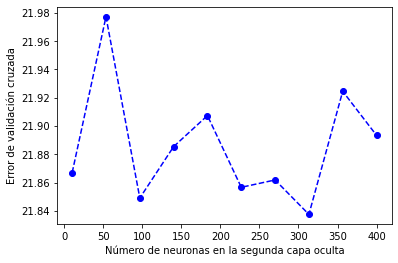

In [46]:
plt.plot(neuronas, error, linestyle='--',color='b')
plt.scatter(neuronas, error, marker='o',color='b')
plt.xlabel('Número de neuronas en la primera capa oculta')
plt.ylabel('Error de validación cruzada')
#plt.yticks([21.8,22])
plt.savefig("ERRORoculta1.png")
#plt.title("Error de validación cruzada frente al número de neuronas en la primera capa oculta")

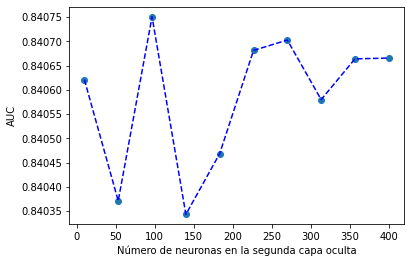

In [47]:
plt.scatter(neuronas, AUC, marker='o')
plt.plot(neuronas, AUC, linestyle='--',color='b')
plt.xlabel('Número de neuronas en la primera capa oculta')
#plt.yticks([0.83,0.84])
plt.ylabel('AUC')
plt.savefig("AUCoculta1.png")

**Utilizo ahora la variable que indica si el jet ha sido originado por un gluon, es decir, isPhysG, para el entrenamiento de la red**. Ahora la variable de salida de la red neuronal valdrá 1 si se trata de un jet originado por un gluon y 0 en caso de ser generado por un quark ligero.

In [36]:
trainG = df
testG = df2

train_yG = train.isPhysG
test_yG = test.isPhysG

In [37]:
train_xG = trainG[input_features]
test_xG = testG[input_features]

train_x_meanG = train_xG.mean()
train_x_stdG = train_xG.std()

train_xG = (train_xG - train_x_meanG) / train_x_stdG
test_xG = (test_xG - train_x_meanG) / train_x_stdG

In [38]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import keras.backend as K
sess = tf.Session()
K.set_session(sess)

from keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout
from sklearn.utils import class_weight



model = Sequential()
model.add(Dense(100, kernel_initializer='normal', activation='relu', input_dim=train_x.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=['accuracy'])


class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(train_y), y=train_y[:]) 


model.fit(train_xG,
          train_yG,
          epochs=10,
          batch_size=128,
          class_weight=class_weights,
          validation_split=0.2,
          shuffle=True,
          verbose=1);

Train on 2111286 samples, validate on 527822 samples
Epoch 1/10
2110976/2111286 [============================>.] - ETA: 0s - loss: 0.4758 - acc: 0.7792

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


2111286/2111286 [==============================] - 66s 31us/sample - loss: 0.4758 - acc: 0.7792 - val_loss: 0.4713 - val_acc: 0.7813
Epoch 2/10
2111286/2111286 [==============================] - 65s 31us/sample - loss: 0.4727 - acc: 0.7807 - val_loss: 0.4715 - val_acc: 0.7816
Epoch 3/10
2111286/2111286 [==============================] - 65s 31us/sample - loss: 0.4721 - acc: 0.7810 - val_loss: 0.4738 - val_acc: 0.7809
Epoch 4/10
2111286/2111286 [==============================] - 65s 31us/sample - loss: 0.4717 - acc: 0.7811 - val_loss: 0.4707 - val_acc: 0.7819
Epoch 5/10
2111286/2111286 [==============================] - 65s 31us/sample - loss: 0.4712 - acc: 0.7814 - val_loss: 0.4722 - val_acc: 0.7819
Epoch 6/10
2111286/2111286 [==============================] - 66s 31us/sample - loss: 0.4711 - acc: 0.7813 - val_loss: 0.4706 - val_acc: 0.7815
Epoch 7/10
2111286/2111286 [==============================] - 66s 31us/sample - loss: 0.4709 - acc: 0.7815 - val_loss: 0.4709 - val_acc: 0.7819
Epo

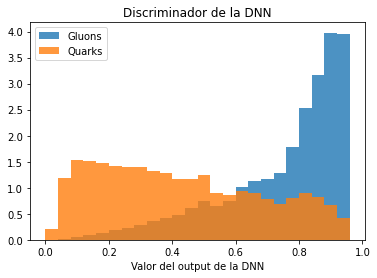

In [39]:
pred_yG = model.predict(test_xG)

plt.clf()
binning = np.arange(0.0, 1.0, 0.04)
plt.hist( pred_yG[test_yG==1], bins=binning, alpha=0.8, label="Gluons", density=1 )
plt.hist( pred_yG[test_yG==0], bins=binning, alpha=0.8, label="Quarks", density=1 )
plt.legend()
plt.xlabel('Valor del output de la DNN')
plt.title('Discriminador de la DNN')
plt.savefig('DNN_classifier.png')

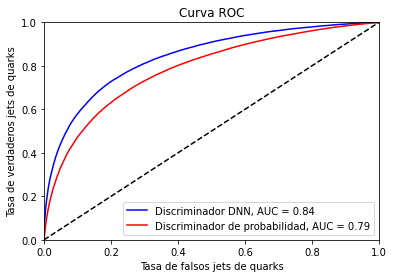

In [40]:
fpr_dnn, tpr_dnn, thresholds_dnn  = roc_curve(1-test_yG,1-pred_yG)
roc_auc_dnn = auc(fpr_dnn, tpr_dnn)

fpr_qgl, tpr_qgl, thresholds_qgl = roc_curve(test_y, test.jetQGl)
roc_auc_qgl = auc(fpr_qgl, tpr_qgl)

plt.clf()
plt.plot(fpr_dnn, tpr_dnn, 'b', label='Discriminador DNN, AUC = %0.2f'% roc_auc_dnn)
plt.plot(fpr_qgl, tpr_qgl, 'r', label='Discriminador de probabilidad, AUC = %0.2f'% roc_auc_qgl)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc = 'lower right')
plt.title("Curva ROC")
plt.ylabel('Tasa de verdaderos jets de quarks')
plt.xlabel('Tasa de falsos jets de quarks')
plt.savefig('ROC_curve_Gluon.png')

In [ ]:
print(train_yG.value_counts())
print(sum(train_yG==1)) #la clase 1 son los gluones y la clase 0 los quarks

In [41]:
from sklearn.metrics import confusion_matrix, classification_report

#calculo la matriz de confusion
y_predG = (model.predict(test_xG)> 0.5).astype("int32") 
#y_predG = np.round(model.predict(test_xG))
#pone el output con valores ente 0 y 1 con un umbral de 0.5

#la clase 1 son los quarks

# Obtener la matriz de confusión
confusion = confusion_matrix(test_yG, y_predG)

print("Matriz de Confusión:")
print(confusion)

# Calcular métricas adicionales
print("\nReporte de Clasificación:")
print(classification_report(test_yG, y_predG))

print(error_validacion(confusion))

Matriz de Confusión:
[[ 58936  34907]
 [ 19876 136571]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.75      0.63      0.68     93843
           1       0.80      0.87      0.83    156447

    accuracy                           0.78    250290
   macro avg       0.77      0.75      0.76    250290
weighted avg       0.78      0.78      0.78    250290

21.887810140237324
